# Runtime & Rating - Is there a connect? - Section 1 - Importing data
# I am going to be using a Rotten Tomatoes Dataset for this test, we will be looking for correlation between Runtime and Audience Rating.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [129]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# This is a [link](https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset) directly to the dataset used for this test.

In [144]:
# In this cell I have mounted the data set and provided 1 example of the format the dataset is currently in.
Movies = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/rotten_tomatoes_movies.csv', index_col=0)
Movies.head(1)

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
rotten_tomatoes_link,,,,,,,,,,,,,,,,,,,,,
m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [ ]:
Movies.info()

In [ ]:
Movies['audience_rating'] = pd.to_numeric(Movies['audience_rating'])

# Section 2 - Filtering our lists.
# In this section I will filter out anything unescessary for the test.

In [ ]:
# Here I created a new filter titled Movies2 which selects only the columns we are using for this test
Movies2 = Movies[['movie_title','genres','audience_rating','runtime']]

In [ ]:
# I then created another filter Movies3 which only applies 1 genre which is horror.
Movies3_filtered = Movies2[Movies2['genres'].isin(['Horror'])]

In [ ]:
# I then wanted to see the info to my new filter.
Movies3_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 33 to 17696
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_title      456 non-null    object 
 1   genres           456 non-null    object 
 2   audience_rating  446 non-null    float64
 3   runtime          446 non-null    float64
dtypes: float64(2), object(2)
memory usage: 17.8+ KB


In [106]:
# Here I further sort our movies into a specific dynamic we want to look at.
Movies3_filtered_rating = Movies3_filtered.loc[(Movies3_filtered['audience_rating'] >= 60) & (Movies3_filtered['runtime'] <= 180)]

In [ ]:
# I then showed how many rows are in the section.
Movies3_filtered.shape

In [ ]:
# Here I did a null check to see our null values.
Movies3_filtered.isnull().sum()

In [ ]:
# After seeing my null values in this section I remove them from my rows.
Movies3_filtered.dropna(inplace=True)
Movies3_filtered.shape

# Section 3 - Listing, Sorting and Visualizing - Horror Movies

---



My hypothesis is that shorter horror movies are more popular. This can be tested by taking in a number of movies the horror genre. I will filter my movies from ratings above 60 and any runtime below 180 minutesand run a pearsonr test to see if there is a correlation between Runtime and Audience Rating. This is valuable to producers so they can see what is the optimal length for their movie and plan accordingly.

In [ ]:
# In the first cell I want to see what my new dataset looks like.
Movies3_filtered.head()

In [ ]:
# I then take it a step farther and sort by runtime so we can easily see the top runtime vs low runtime.
Movies3_filtered.sort_values('runtime').iloc[0:5]

In [107]:
# I then run my pearsonr test to see the correlation between runtime and audience rating. 
stats.pearsonr(Movies3_filtered_rating['runtime'],Movies3_filtered_rating['audience_rating'])

(0.063921519096992, 0.5963934329330153)

# As we can see from the pearsonr test there is little to no correlation to support my hypothesis.

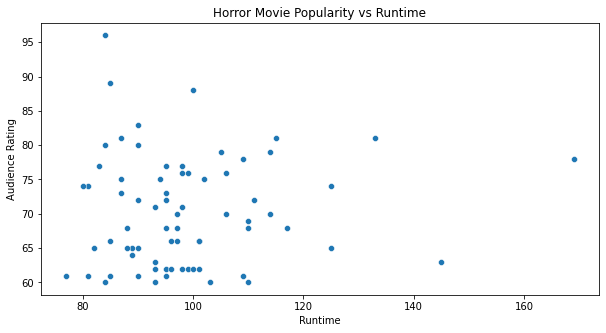

In [108]:
# After running our personr test it is timme to show a scatterpoint graph to visualize our data. 
# As you can see from our graph there is little to no correlation. 
plt.figure(figsize=(10,5))
sns.scatterplot(x="runtime", y="audience_rating", data=Movies3_filtered_rating)
plt.xlabel("Runtime")
plt.ylabel("Audience Rating")
plt.title('Horror Movie Popularity vs Runtime')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf8256ee10>]],
      dtype=object)

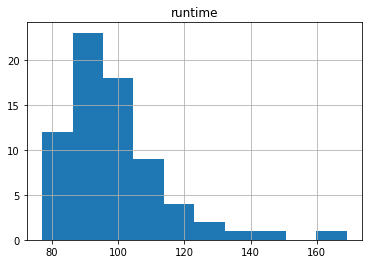

In [153]:
# After running our personr test it is timme to show a boxplot graph to visualize our data. 
Movies3_filtered_rating.hist(column ='runtime')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf8251a6d0>]],
      dtype=object)

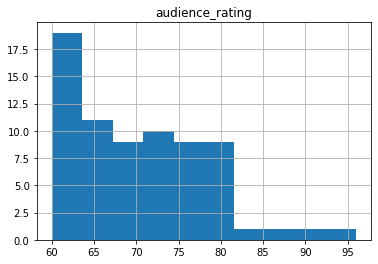

In [154]:
# After running our personr test it is timme to show a boxplot graph to visualize our data. 
Movies3_filtered_rating.hist(column ='audience_rating')

# Section 4 - Listing, Sorting and Visualizing - Action Movies

My hypothesis is that longer action movies are more popular. This can be tested by taking in a number of movies the horror genre. I will filter my movies from ratings above 60 and any runtime below 180 minutesand run a pearsonr test to see if there is a correlation between Runtime and Audience Rating. This is valuable to producers so they can see what is the optimal length for their movie and plan accordingly.

In [113]:
# I created another filter Movies4 which only applies 1 genre which is action & adventure.
Movies4_filtered = Movies2[Movies2['genres'].isin(['Action & Adventure'])]

In [120]:
# I then wanted to see the info to my new filter.
Movies4_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 197 to 17574
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_title      202 non-null    object 
 1   genres           202 non-null    object 
 2   audience_rating  202 non-null    float64
 3   runtime          202 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.9+ KB


In [123]:
# Here I further sort our movies into a specific dynamic we want to look at.
Movies4_filtered_rating = Movies4_filtered.loc[(Movies4_filtered['audience_rating'] >= 60) & (Movies4_filtered['runtime'] <= 180)]

In [ ]:
# I then showed how many rows are in the section.
Movies4_filtered.shape

In [122]:
# Here I did a null check to see our null values.
Movies4_filtered.isnull().sum()

movie_title        0
genres             0
audience_rating    0
runtime            0
dtype: int64

In [ ]:
# After seeing my null values in this section I remove them from my rows.
Movies3_filtered.dropna(inplace=True)
Movies3_filtered.shape

In [119]:
# In the first cell I want to see what my new dataset looks like.
Movies4_filtered.head()

,movie_title,genres,audience_rating,runtime
197,Bitch Slap,Action & Adventure,29.0,104.0
336,Breakout,Action & Adventure,41.0,96.0
380,Commando,Action & Adventure,67.0,90.0
604,Missing in Action,Action & Adventure,42.0,102.0
631,Nighthawks,Action & Adventure,54.0,99.0


In [116]:
# I then take it a step farther and sort by runtime so we can easily see the top runtime vs low runtime.
Movies4_filtered.sort_values('runtime').iloc[0:60]

,movie_title,genres,audience_rating,runtime
8858,Justice League: Gods and Monsters,Action & Adventure,71.0,72.0
4048,Bring Me the Head of the Machine Gun Woman (Tr...,Action & Adventure,43.0,75.0
2826,Antboy,Action & Adventure,36.0,77.0
8406,Intensive Care,Action & Adventure,14.0,80.0
1435,Torque,Action & Adventure,41.0,81.0
3726,Blind Fury,Action & Adventure,51.0,82.0
2903,Jackpot,Action & Adventure,55.0,82.0
11643,Passenger 57,Action & Adventure,38.0,83.0
15319,The Last Heist,Action & Adventure,12.0,84.0
16904,Vigilante Diaries,Action & Adventure,69.0,84.0


In [124]:
# I then run my pearsonr test to see the correlation between runtime and audience rating. 
stats.pearsonr(Movies4_filtered['runtime'],Movies4_filtered['audience_rating'])

(0.3949216402755179, 6.019562883900148e-09)

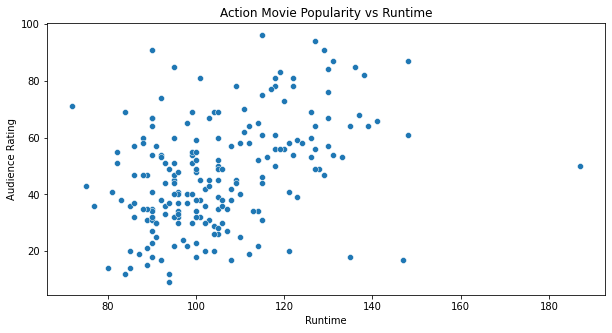

In [125]:
# After running our personr test it is timme to show a scatterpoint graph to visualize our data. 
# As you can see from our graph there is little to no correlation.
plt.figure(figsize=(10,5))
sns.scatterplot(x="runtime", y="audience_rating", data=Movies4_filtered)
plt.xlabel("Runtime")
plt.ylabel("Audience Rating")
plt.title('Action Movie Popularity vs Runtime',)
plt.show()

In [ ]:
# After running our personr test it is timme to show a boxplot graph to visualize our data. 
Movies3_filtered_rating.hist(column ='runtime')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf8242d790>]],
      dtype=object)

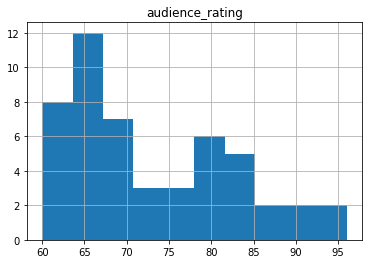

In [156]:
# After running our personr test it is timme to show a boxplot graph to visualize our data. 
Movies4_filtered_rating.hist(column ='audience_rating')

# Section 5 - Conclusion